In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_dim = 1536, hidden_dims = [512], output_dim = 6, dropout = 0.2).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 50
PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
embs_wav2vec = torch.load('../embeddings/audio/raw_wav2vec2.pt')
embs_hubert = torch.load('../embeddings/audio/raw_hubert.pt')
embs_wavlm = torch.load('../embeddings/audio/raw_wavlm.pt')
embs_video = torch.load('../embeddings/video/raw.pt')

Epoch 5/50
Train Loss: 0.9825,                    Train Accuracy: 0.6277,                    Train Precision: 0.6251,                    Train Recall 0.6277.
Val Loss: 1.0255,                    Val Accuracy: 0.6058,                    Val Precision: 0.6976,                    Val Recall: 0.6058.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.7953,                    Train Accuracy: 0.6998,                    Train Precision: 0.6993,                    Train Recall 0.6998.
Val Loss: 0.7293,                    Val Accuracy: 0.7166,                    Val Precision: 0.7489,                    Val Recall: 0.7166.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.6994,                    Train Accuracy: 0.7374,                    Train Precision: 0.7377,                    Train Recall 0.7374.
Val Loss: 0.6738,                    Val Accuracy: 0.7488,                    Val Precision: 0.7737,                    Val Recall: 0.7488.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.6315,                    Train Accuracy: 0.7638,                    Train Precision: 0.7635,                    Train Recall 0.7638.
Val Loss: 0.6220,                    Val Accuracy: 0.7757,                    Val Precision: 0.7912,                    Val Recall: 0.7757.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.5961,                    Train Accuracy: 0.7757,                    Train Precision: 0.7769,                    Train Recall 0.7757.
Val Loss: 0.5705,                    Val Accuracy: 0.7945,                    Val Precision: 0.7916,                    Val Recall: 0.7945.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.6226,                    Train Accuracy: 0.7636,                    Train Precision: 0.7648,                    Train Recall 0.7636.
Val Loss: 0.5964,                    Val Accuracy: 0.7737,                    Val Precision: 0.7872,                    Val Recall: 0.7737.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.5722,                    Train Accuracy: 0.7880,                    Train Precision: 0.7900,                    Train Recall 0.7880.
Val Loss: 0.5728,                    Val Accuracy: 0.7884,                    Val Precision: 0.7955,                    Val Recall: 0.7884.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.5161,                    Train Accuracy: 0.8046,                    Train Precision: 0.8059,                    Train Recall 0.8046.
Val Loss: 0.5355,                    Val Accuracy: 0.8113,                    Val Precision: 0.8166,                    Val Recall: 0.8113.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.5421,                    Train Accuracy: 0.7923,                    Train Precision: 0.7940,                    Train Recall 0.7923.
Val Loss: 0.5718,                    Val Accuracy: 0.7871,                    Val Precision: 0.8047,                    Val Recall: 0.7871.
--------------------------------------------------


BEST EPOCH: 37.00          BEST ACCURACY: 0.82          BEST PRECISION: 0.83          BEST RECALL: 0.82


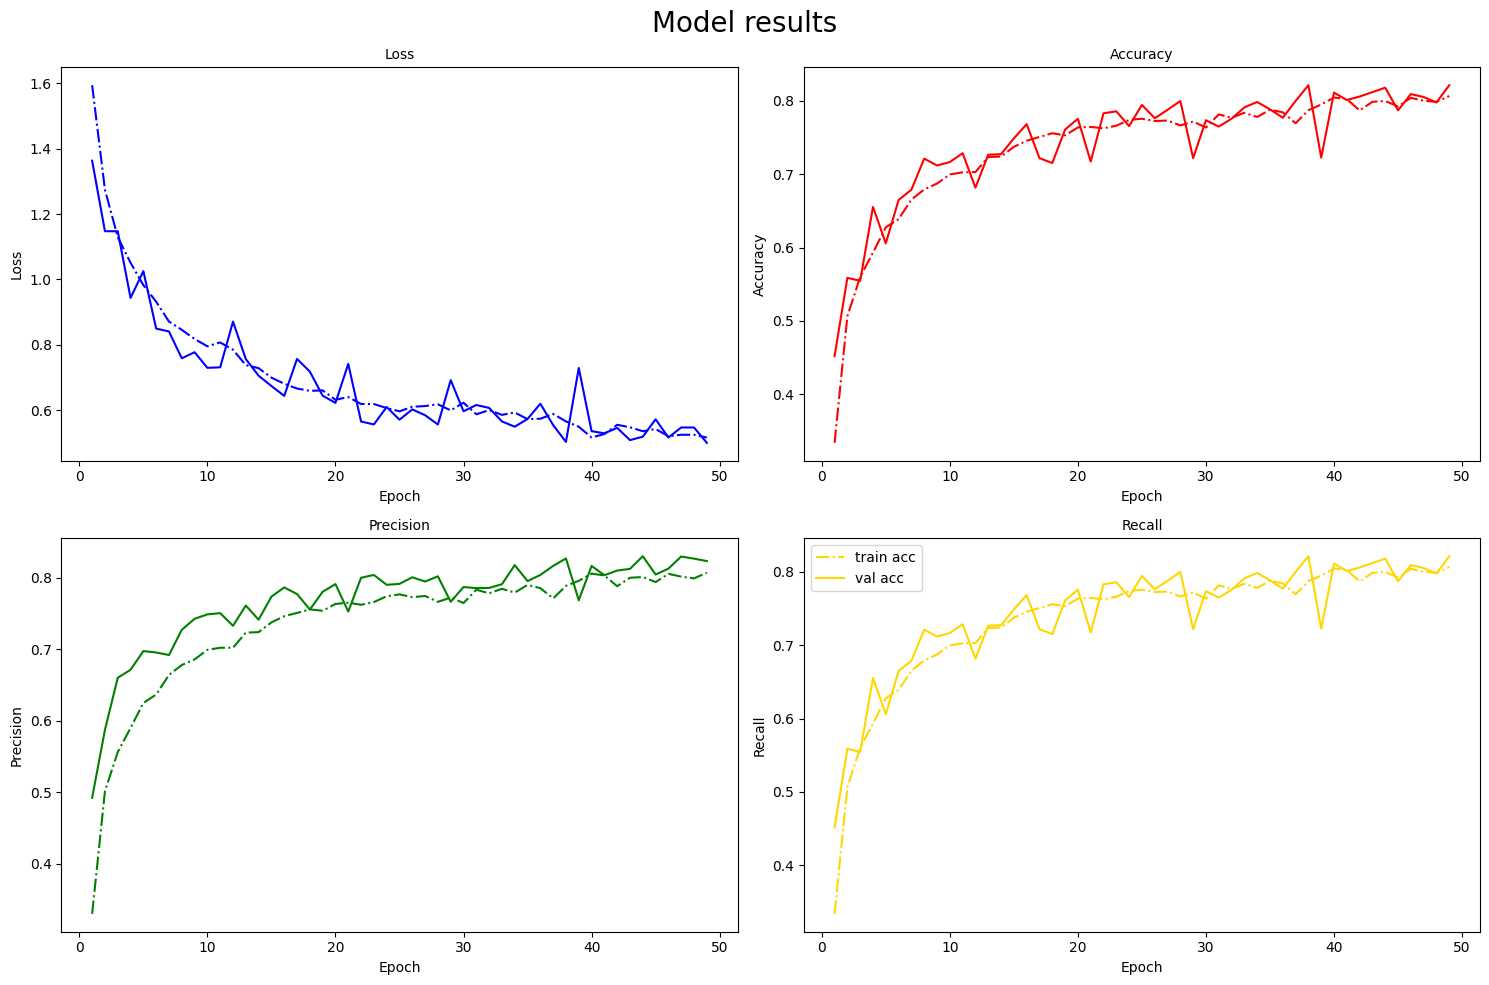

Epoch 5/50
Train Loss: 0.8268,                    Train Accuracy: 0.6845,                    Train Precision: 0.6857,                    Train Recall 0.6845.
Val Loss: 0.7515,                    Val Accuracy: 0.7381,                    Val Precision: 0.7738,                    Val Recall: 0.7381.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.7300,                    Train Accuracy: 0.7204,                    Train Precision: 0.7228,                    Train Recall 0.7204.
Val Loss: 0.6716,                    Val Accuracy: 0.7529,                    Val Precision: 0.7612,                    Val Recall: 0.7529.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.6725,                    Train Accuracy: 0.7480,                    Train Precision: 0.7514,                    Train Recall 0.7480.
Val Loss: 0.5634,                    Val Accuracy: 0.7999,                    Val Precision: 0.8158,                    Val Recall: 0.7999.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.6415,                    Train Accuracy: 0.7594,                    Train Precision: 0.7619,                    Train Recall 0.7594.
Val Loss: 0.5364,                    Val Accuracy: 0.8046,                    Val Precision: 0.8073,                    Val Recall: 0.8046.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.6383,                    Train Accuracy: 0.7591,                    Train Precision: 0.7647,                    Train Recall 0.7591.
Val Loss: 0.4725,                    Val Accuracy: 0.8261,                    Val Precision: 0.8344,                    Val Recall: 0.8261.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.5774,                    Train Accuracy: 0.7851,                    Train Precision: 0.7892,                    Train Recall 0.7851.
Val Loss: 0.5488,                    Val Accuracy: 0.7985,                    Val Precision: 0.8138,                    Val Recall: 0.7985.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.5700,                    Train Accuracy: 0.7831,                    Train Precision: 0.7871,                    Train Recall 0.7831.
Val Loss: 0.5302,                    Val Accuracy: 0.7999,                    Val Precision: 0.8312,                    Val Recall: 0.7999.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.5658,                    Train Accuracy: 0.7866,                    Train Precision: 0.7915,                    Train Recall 0.7866.
Val Loss: 0.5523,                    Val Accuracy: 0.8059,                    Val Precision: 0.8250,                    Val Recall: 0.8059.
--------------------------------------------------


BEST EPOCH: 30.00          BEST ACCURACY: 0.83          BEST PRECISION: 0.83          BEST RECALL: 0.83


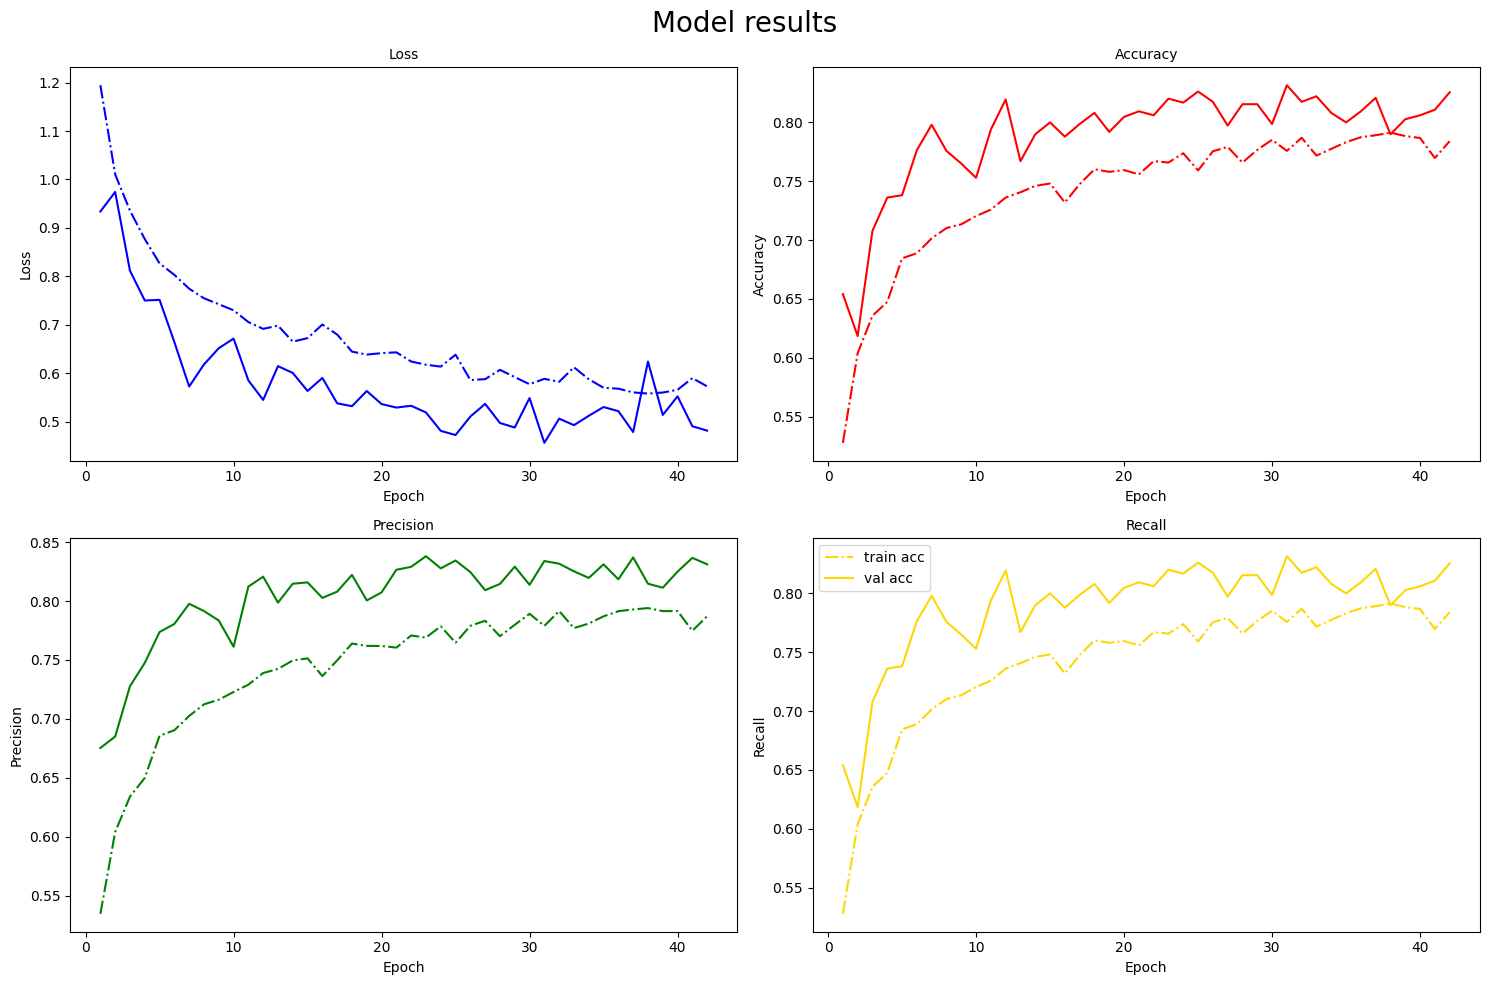

Epoch 5/50
Train Loss: 0.6762,                    Train Accuracy: 0.7497,                    Train Precision: 0.7569,                    Train Recall 0.7497.
Val Loss: 0.4815,                    Val Accuracy: 0.8267,                    Val Precision: 0.8335,                    Val Recall: 0.8267.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.5895,                    Train Accuracy: 0.7781,                    Train Precision: 0.7840,                    Train Recall 0.7781.
Val Loss: 0.4945,                    Val Accuracy: 0.8267,                    Val Precision: 0.8317,                    Val Recall: 0.8267.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.4960,                    Train Accuracy: 0.8164,                    Train Precision: 0.8217,                    Train Recall 0.8164.
Val Loss: 0.4111,                    Val Accuracy: 0.8677,                    Val Precision: 0.8729,                    Val Recall: 0.8677.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.4716,                    Train Accuracy: 0.8332,                    Train Precision: 0.8385,                    Train Recall 0.8332.
Val Loss: 0.3848,                    Val Accuracy: 0.8670,                    Val Precision: 0.8719,                    Val Recall: 0.8670.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.4636,                    Train Accuracy: 0.8293,                    Train Precision: 0.8336,                    Train Recall 0.8293.
Val Loss: 0.3859,                    Val Accuracy: 0.8724,                    Val Precision: 0.8782,                    Val Recall: 0.8724.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.4196,                    Train Accuracy: 0.8498,                    Train Precision: 0.8539,                    Train Recall 0.8498.
Val Loss: 0.4849,                    Val Accuracy: 0.8294,                    Val Precision: 0.8454,                    Val Recall: 0.8294.
--------------------------------------------------


BEST EPOCH: 22.00          BEST ACCURACY: 0.89          BEST PRECISION: 0.89          BEST RECALL: 0.89


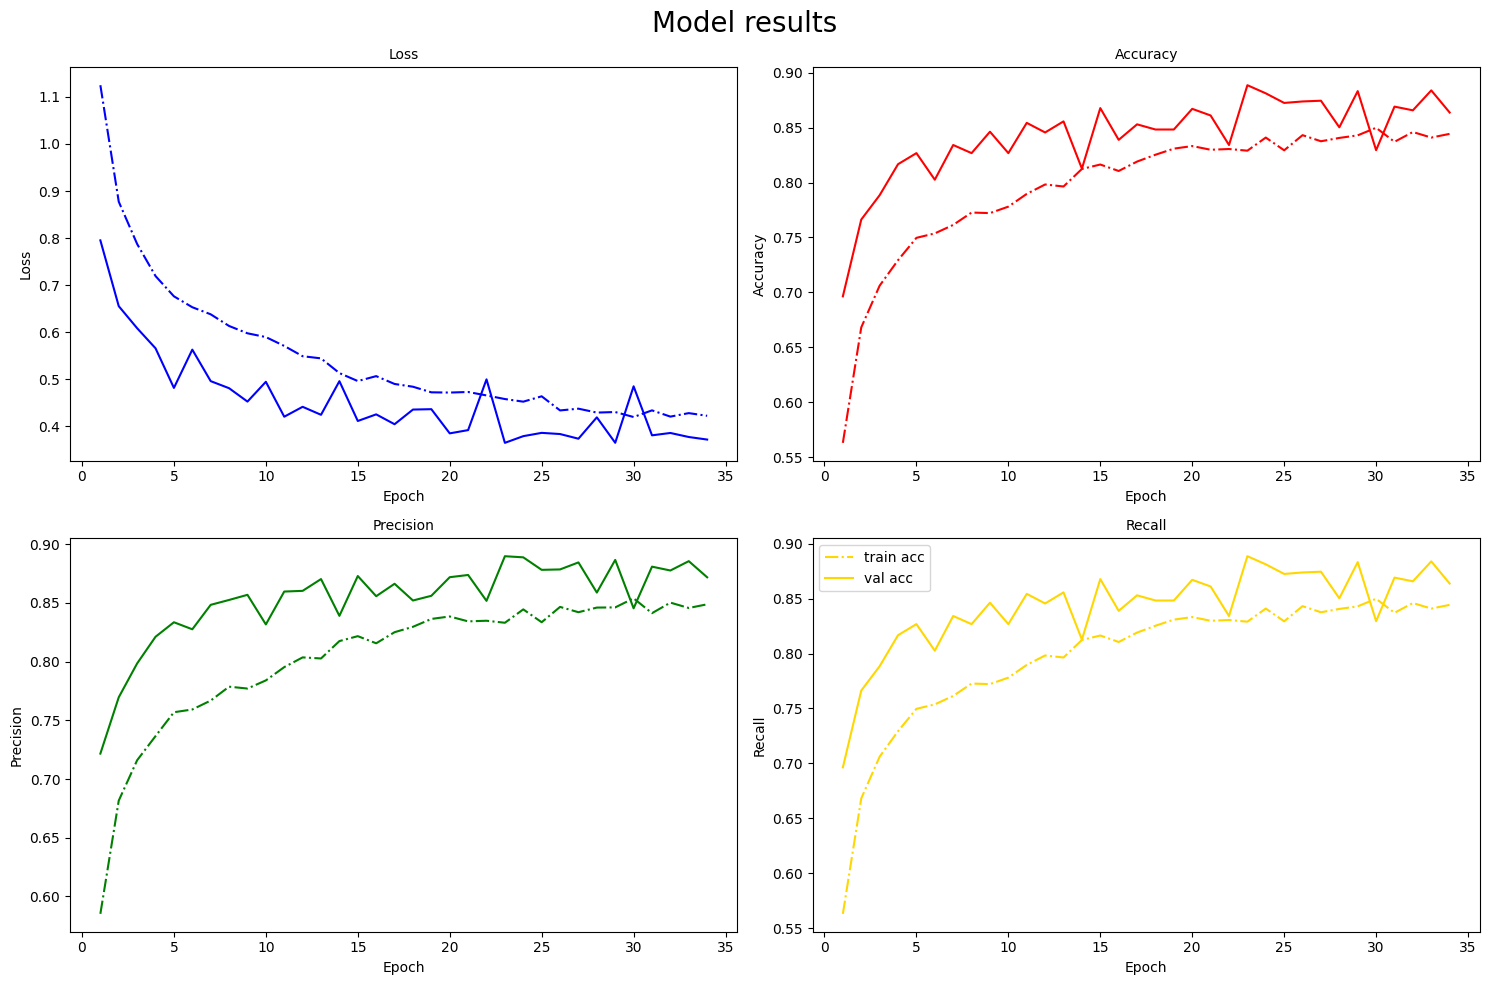

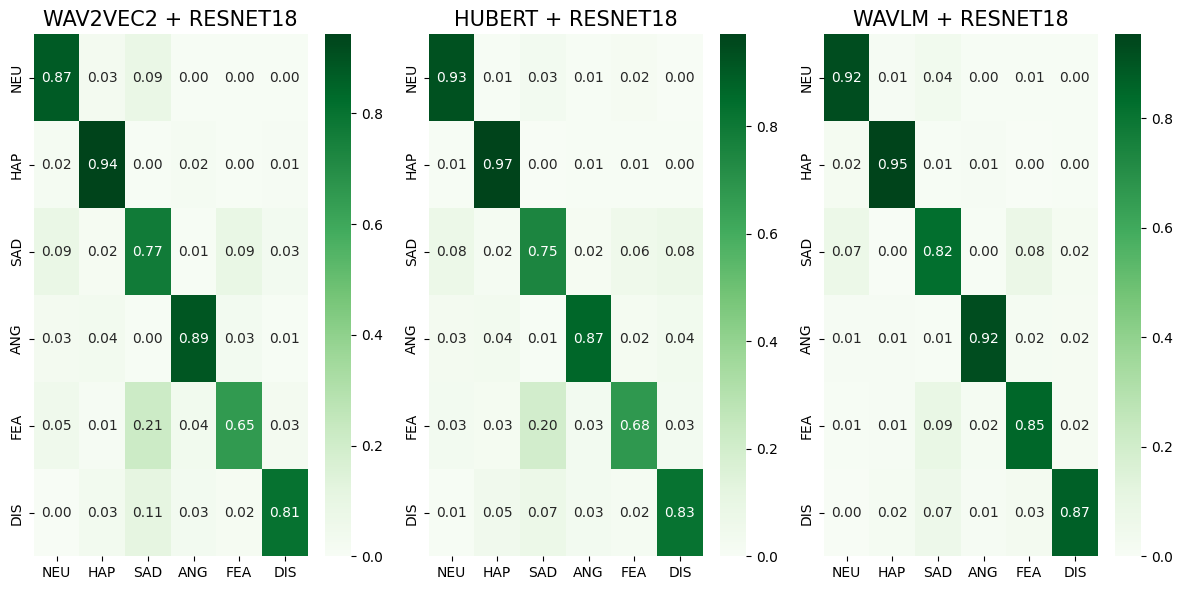

In [4]:
best_losses = []
best_accs = []
best_precs = []
best_recs = []
cms = []
embs_dict = {'WAV2VEC2 + RESNET18': embs_wav2vec, 'HUBERT + RESNET18': embs_hubert, 'WAVLM + RESNET18': embs_wavlm}

for embs in embs_dict.values():
    fused_embs = concat_embs(embs, embs_video)
    train_loader, test_loader = train_test_dataloader(fused_embs)
    params_copy = PARAMS.copy()
    params_copy['train_loader'] = train_loader
    params_copy['test_loader'] = test_loader
    epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = train_model(**params_copy)
    best_losses.append(val_losses[best_epoch])
    best_accs.append(val_accs[best_epoch])
    best_precs.append(val_precs[best_epoch])
    best_recs.append(val_recs[best_epoch])
    cms.append(cm)
    plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

plot_multiple_confusion_matrices(**dict(zip(list(embs_dict.keys()), cms)))

df = pd.DataFrame({'Model': embs_dict.keys(), 'Loss': best_losses, 'Accuracy': best_accs, 'Precision': best_precs, 'Recall': best_recs})

In [5]:
df

,Model,Loss,Accuracy,Precision,Recall
0,WAV2VEC2 + RESNET18,0.502622,0.821357,0.827149,0.821357
1,HUBERT + RESNET18,0.456356,0.831430,0.833982,0.831430
2,WAVLM + RESNET18,0.364698,0.888516,0.889799,0.888516
